# Asteroid Classification

#### IMPORTING LIBRARIES

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from mpl_toolkits import mplot3d

In [26]:
from mlxtend.feature_selection import SequentialFeatureSelector as sf
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [30]:
from sklearn.metrics import classification_report, confusion_matrix, cohen_kappa_score, accuracy_score,roc_auc_score,roc_curve, plot_roc_curve
from sklearn.model_selection import train_test_split,cross_val_score,KFold

In [5]:
df_asteroid = pd.read_csv("nasa.csv")
df_asteroid.head()  

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


#### DATA UNDERSTANDING

In [6]:
df_asteroid.shape

(4687, 40)

Data contains 4687 rows and 40 columns.

In [7]:
df_asteroid.isnull().sum()

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [8]:
df_asteroid.duplicated().sum()

0

No null and duplicate values are present.

In [9]:
df_asteroid.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [10]:
df_asteroid.describe(include=object)

,Close Approach Date,Orbiting Body,Orbit Determination Date,Equinox
count,4687,4687,4687,4687
unique,777,1,2680,1
top,2016-07-22,Earth,2017-06-21 06:17:20,J2000
freq,18,4687,9,4687


In [11]:
df_asteroid.groupby("Hazardous").count().iloc[:,0]

Hazardous
False    3932
True      755
Name: Neo Reference ID, dtype: int64

#### EDA

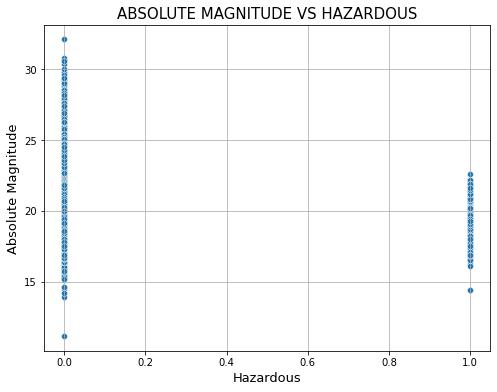

In [12]:
plt.figure(figsize =(8,6))
sns.scatterplot(y =df_asteroid['Absolute Magnitude'],x=df_asteroid['Hazardous'])
plt.grid(True)
plt.title("ABSOLUTE MAGNITUDE VS HAZARDOUS",fontdict={'size':15})
plt.xlabel("Hazardous",fontdict={'size':13})
plt.ylabel("Absolute Magnitude",fontdict={'size':13})
plt.show()

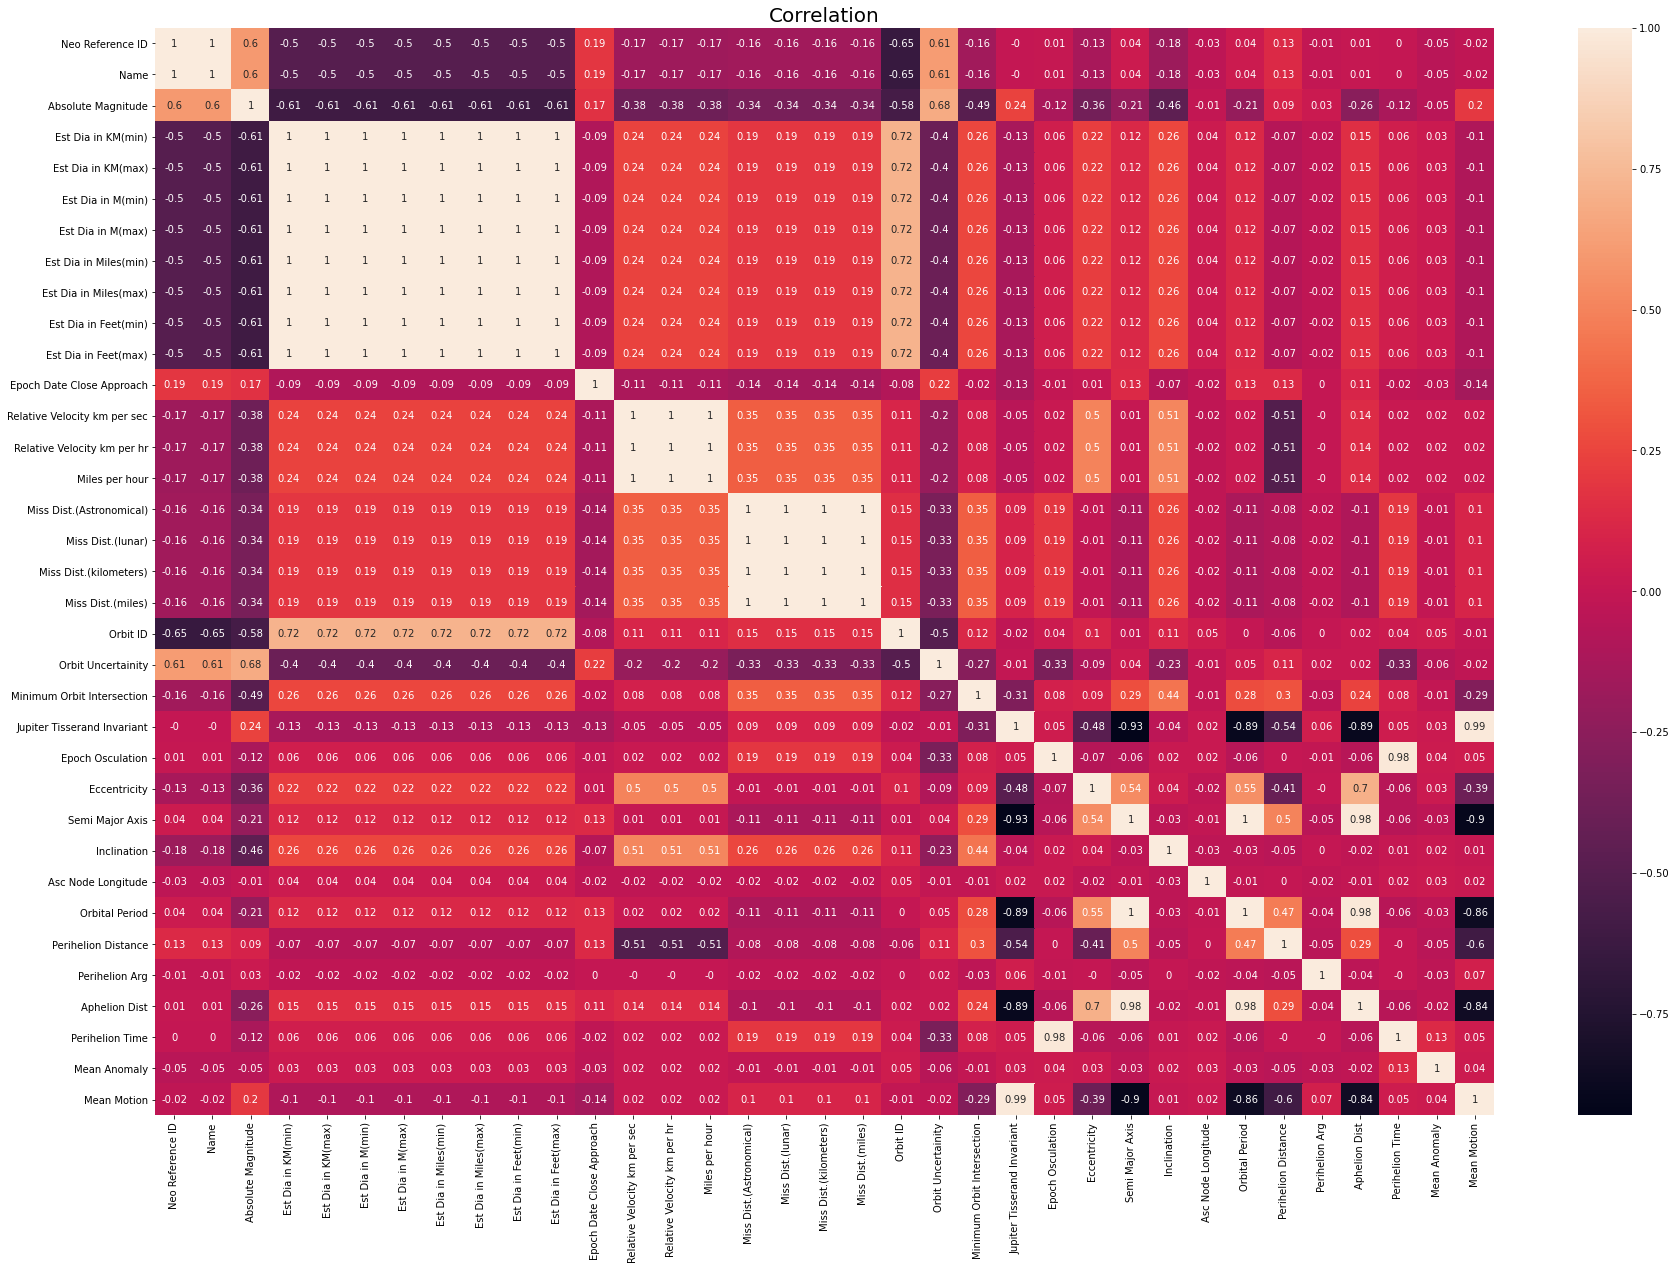

In [13]:
plt.figure(figsize=(30,20))
sns.heatmap(round(df_asteroid.select_dtypes(exclude=object).iloc[:,:-1].corr(),2),annot=True)
plt.title('Correlation',fontdict={'size':20})
plt.show()

There are some highly correlated variables in the data. It is not surprising as the data belongs to space science.

Examples:
- Mean motion and Jupyter Transcend invariant
- Mean motion and semi major axis

There are 40 columns in the data, one of the approaches is to apply feature selection technique instead of manually removing the columns for modelling purpose. This approach is followed while building models for prediction of hazardous asteroid.

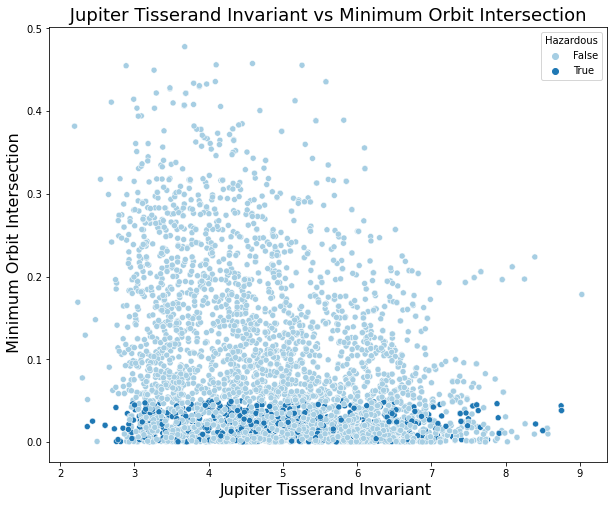

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df_asteroid['Jupiter Tisserand Invariant'],y=df_asteroid['Minimum Orbit Intersection'],hue=df_asteroid['Hazardous'],
                palette='Paired')
plt.title(' Jupiter Tisserand Invariant vs Minimum Orbit Intersection ', fontdict={'size':18})
plt.xlabel( 'Jupiter Tisserand Invariant ', fontdict={'size':16})
plt.ylabel(" Minimum Orbit Intersection",fontdict={'size':16})
plt.show()

Above graph shows that when the Minimum Orbit Distance is less, the chances of asteroid being hazardous is very high while Jupiter Tisserand Invariant shows uniform distribution of hazardous asteroid.

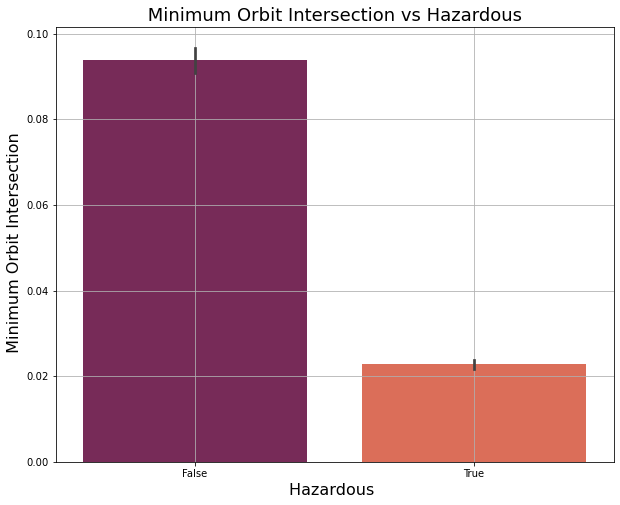

In [15]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_asteroid['Hazardous'],y=df_asteroid['Minimum Orbit Intersection'], palette='rocket')
plt.title(' Minimum Orbit Intersection vs Hazardous ', fontdict={'size':18})
plt.xlabel( 'Hazardous ', fontdict={'size':16})
plt.ylabel(" Minimum Orbit Intersection",fontdict={'size':16})
plt.grid(True)
plt.show()

Hazardous asteroid possess less value of Mininum orbit intersection

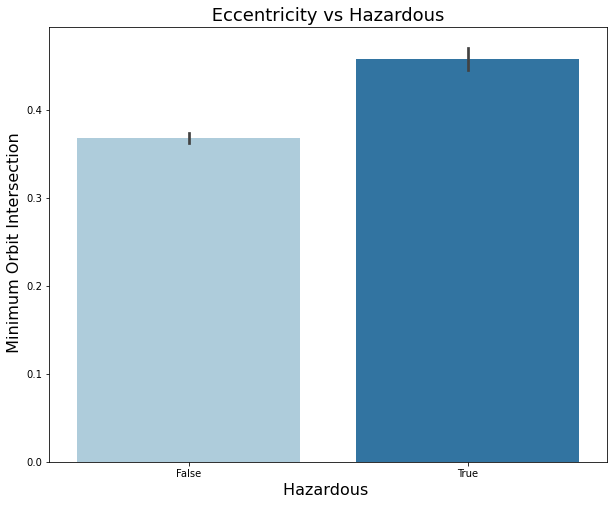

In [16]:
plt.figure(figsize=(10,8))
sns.barplot(x=df_asteroid['Hazardous'],y=df_asteroid['Eccentricity'],palette='Paired')
plt.title(' Eccentricity vs Hazardous ', fontdict={'size':18})
plt.xlabel( 'Hazardous ', fontdict={'size':16})
plt.ylabel(" Minimum Orbit Intersection",fontdict={'size':16})
plt.show()

From the barlplot it is clear that Minimum orbit intersection is  more for Hazardous asteroid.

#### DATA PREPROCESSING

In [19]:
df_asteroid.std().sort_values()

Minimum Orbit Intersection      9.029997e-02
Miss Dist.(Astronomical)        1.457982e-01
Eccentricity                    1.804438e-01
Est Dia in Miles(min)           2.296422e-01
Perihelion Distance             2.420591e-01
Mean Motion                     3.426271e-01
Hazardous                       3.676475e-01
Est Dia in KM(min)              3.695734e-01
Est Dia in Miles(max)           5.134956e-01
Semi Major Axis                 5.241539e-01
Est Dia in KM(max)              8.263912e-01
Aphelion Dist                   9.515195e-01
Jupiter Tisserand Invariant     1.237818e+00
Absolute Magnitude              2.890972e+00
Orbit Uncertainity              3.078307e+00
Relative Velocity km per sec    7.293223e+00
Inclination                     1.093623e+01
Orbit ID                        3.829967e+01
Miss Dist.(lunar)               5.671549e+01
Asc Node Longitude              1.032768e+02
Perihelion Arg                  1.035130e+02
Mean Anomaly                    1.075016e+02
Est Dia in

None of the variables have zero standard deviation.

In [20]:
df_asteroid.drop(['Neo Reference ID','Name'],axis=1,inplace =True) # removing irrelevant columns
df_asteroid.drop(['Orbiting Body','Equinox'],axis=1,inplace=True)

In [21]:
df_asteroid.drop(['Orbit ID'], axis=1,inplace=True)

In [22]:
df_asteroid['Close Approach Date'] =pd.to_datetime(df_asteroid['Close Approach Date']) # converting object into time
df_asteroid['Close Approach Date']=2021-df_asteroid['Close Approach Date'].dt.year  #converting time into interval

In [23]:
df_asteroid.drop('Orbit Determination Date',axis=1, inplace=True)

In [24]:
#function to convert the target variable into 0 and 1
def replace_target(val):
  if val ==True:
    return 1      #  1 for hazardous
  elif val ==False:
    return 0    # 0 for non hazardous
  else:
    return np.nan

df_asteroid['Hazardous'] = df_asteroid['Hazardous'].apply(replace_target)

In [25]:
df_asteroid['Hazardous'].head(5)

0    1
1    0
2    1
3    0
4    1
Name: Hazardous, dtype: int64

In [27]:
X = np.array( df_asteroid.iloc[:,:-1]) #converting data frame into array to make the computation faster
y= np.array(df_asteroid['Hazardous'])
minimax =MinMaxScaler() #scaling the data 
X = minimax.fit_transform(X)
X= pd.DataFrame(X,columns=df_asteroid.iloc[:,:-1].columns)
X.head()

,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),Est Dia in Feet(max),Close Approach Date,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
0,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,1.0,...,0.177530,0.079736,0.873489,0.108378,0.596770,0.159035,0.146942,0.922502,0.735825,0.258239
1,0.484241,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,0.009311,1.0,...,0.110378,0.376677,0.379866,0.062396,0.522896,0.869714,0.084790,0.880542,0.482720,0.388713
2,0.436485,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,0.014795,1.0,...,0.189158,0.056020,0.720954,0.116882,0.713687,0.690049,0.142186,0.917790,0.813777,0.242271
3,0.775549,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,0.000500,1.0,...,0.143620,0.104671,0.158852,0.084473,0.740847,0.051949,0.088525,0.892829,0.190984,0.314430
4,0.498567,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,0.008101,1.0,...,0.136823,0.222555,0.235139,0.079847,0.727546,0.439619,0.083102,0.882772,0.375475,0.327805


#### MODEL CREATION

###### KNN

In [28]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)

In [29]:
knn =KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(X_train,y_train)
y_predict=knn_model.predict(X_test)

In [31]:
#Function to check the performance of the model
## the function applies cross validation only on the accuracy of train and test data to check the overfitting issue
def model_performance(model,cv=5):
  y_predict = model.predict(X_test)
  print("CONFUSION MATRIX")
  cm=confusion_matrix(y_test,y_predict)    # confusing matrix 
  print(confusion_matrix(y_test,y_predict),'\n')
  total = len(y_test)
  miss = 100*(cm[0][1]+cm[1][0])/total
  correct = 100*(cm[0][0]+cm[1][1])/total
  print('MISSCLASSIFIED PERCENTAGE')
  print(miss,'\n')
  print("CORRECTLY CLASSIFIED PERCENTAGE")
  print(correct,'\n')
  print("ACCURACY SCORE FOR TEST")
  score_test=cross_val_score(model,X_test,y_test,cv=cv)     
  print(score_test.mean(),'\n')
  print("ACCURACY SCORE FOR TRAIN")
  score_train=cross_val_score(model,X_train,y_train,cv=cv)
  print(score_train.mean(),'\n')
  y_prob = model.predict_proba(X_test)[:,1]
  print("AUC SCORE")
  
  print(roc_auc_score(y_test,y_prob),'\n')
  print("Kappa score")
  print(cohen_kappa_score(y_test,y_predict),'\n')
  print("CLASSIFICATION REPORT")
  print(classification_report(y_test,y_predict,digits=6))   # claissification report 

In [32]:
model_performance(knn_model,cv=10)

CONFUSION MATRIX
[[1106   69]
 [ 140   92]] 

MISSCLASSIFIED PERCENTAGE
14.854299928926794 

CORRECTLY CLASSIFIED PERCENTAGE
85.14570007107321 

ACCURACY SCORE FOR TEST
0.8415146909827762 

ACCURACY SCORE FOR TRAIN
0.8692073170731707 

AUC SCORE
0.8375531914893616 

Kappa score
0.38512316857188866 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.887640  0.941277  0.913672      1175
           1   0.571429  0.396552  0.468193       232

    accuracy                       0.851457      1407
   macro avg   0.729535  0.668914  0.690933      1407
weighted avg   0.835500  0.851457  0.840217      1407



Above model works fine but lacks in recall, f1-score and precision.

<Figure size 720x360 with 0 Axes>

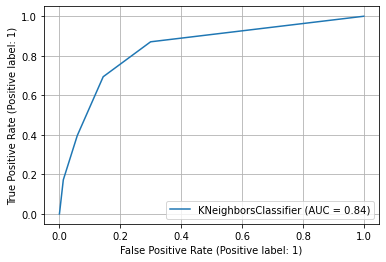

In [33]:
plt.figure(figsize=(10,5)) # test 
plot_roc_curve(knn,X_test,y_test)
plt.grid(True)
plt.show()

<Figure size 720x360 with 0 Axes>

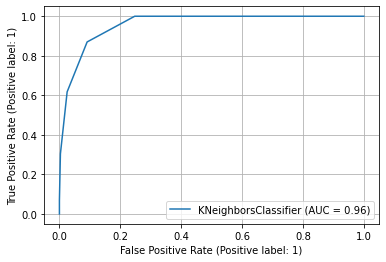

In [34]:
plt.figure(figsize=(10,5)) # train
plot_roc_curve(knn,X_train,y_train)
plt.grid(True)
plt.show()

Difference in AUC score of test and train and the accuracy of test and train indicate overfitting. 

In [35]:
#hyperparameter tuning for knn
knn = KNeighborsClassifier(n_jobs=-1)
param = {'metric':['euclidean','manhattan','minkowski','mahalanobis'],'n_neighbors':range(3,25,2),'weights':['uniform','distance']}
grid =GridSearchCV(knn,cv=5,param_grid=param,verbose=2)   # applying grid search 
gridcv =grid.fit(X_train,y_train)

Fitting 5 folds for each of 88 candidates, totalling 440 fits
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=3, weights=uniform; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ..metric=euclidean, n_neighbors=3, weights=distance; total time=   0.0s
[CV] END ...metric=euclidean, n_neighbors=5, weights=uniform; total time=   0.1s
[CV] END ...metric=euclidean, n_neighbors=5, we

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=3, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=3, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=3, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=3, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=3, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=3, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=3, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=3, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=3, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=3, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=5, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=5, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=5, weights=uniform; total time=   0.6s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=5, weights=uniform; total time=   0.7s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=5, weights=uniform; total time=   0.6s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=5, weights=distance; total time=   0.6s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=5, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=5, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=5, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=5, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=7, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=7, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=7, weights=uniform; total time=   2.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=7, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=7, weights=uniform; total time=   0.6s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=7, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=7, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=7, weights=distance; total time=   1.1s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=7, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=7, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=9, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=9, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=9, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=9, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END .metric=mahalanobis, n_neighbors=9, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=9, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=9, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=9, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=9, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=9, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=11, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=13, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=15, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=17, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=19, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=21, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=uniform; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=uniform; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=distance; total time=   0.4s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=distance; total time=   0.3s


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1462: FutureWarning:

from version 1.0 (renaming of 0.25), pairwise_distances for metric='mahalanobis' will require VI to be specified if Y is passed.



[CV] END metric=mahalanobis, n_neighbors=23, weights=distance; total time=   0.4s


In [36]:
gridcv.best_params_ # finding best parameters

{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}

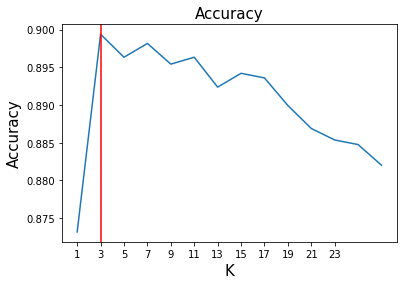

In [37]:
accuracy = []
for k in np.arange(1,29,2):
    knn = KNeighborsClassifier(k, metric = 'manhattan',weights='distance')
   
   
    score = cross_val_score(knn, X_train, y_train, cv = 5)

    score = score.mean()

    accuracy.append(score)
plt.plot(range(1,29,2), accuracy)


plt.title('Accuracy', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

plt.xticks(np.arange(1, 25, step = 2))

plt.axvline(x = 3, color = 'red')

plt.show()

In [38]:
knn =KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance') # full model with best params
knn_model = knn.fit(X_train,y_train)
model_performance(knn_model,cv=10)

CONFUSION MATRIX
[[1118   57]
 [ 117  115]] 

MISSCLASSIFIED PERCENTAGE
12.366737739872068 

CORRECTLY CLASSIFIED PERCENTAGE
87.63326226012794 

ACCURACY SCORE FOR TEST
0.8663576494427557 

ACCURACY SCORE FOR TRAIN
0.9009146341463415 

AUC SCORE
0.8523991195891415 

Kappa score
0.4989603372764111 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.905263  0.951489  0.927801      1175
           1   0.668605  0.495690  0.569307       232

    accuracy                       0.876333      1407
   macro avg   0.786934  0.723590  0.748554      1407
weighted avg   0.866241  0.876333  0.868689      1407



There is an improvement in the model but same issue still occurs, the model is not performing well on recall, precision, f1 score and kappa score.

In [39]:
from sklearn.ensemble import BaggingClassifier

In [40]:
knn =KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance') 
bc =BaggingClassifier(knn)
bc_model = bc.fit(X_train,y_train)
model_performance(bc_model,cv=5)

CONFUSION MATRIX
[[1113   62]
 [ 112  120]] 

MISSCLASSIFIED PERCENTAGE
12.366737739872068 

CORRECTLY CLASSIFIED PERCENTAGE
87.63326226012794 

ACCURACY SCORE FOR TEST
0.8571666540470962 

ACCURACY SCORE FOR TRAIN
0.896341463414634 

AUC SCORE
0.8793158473954511 

Kappa score
0.5084469430780043 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.908571  0.947234  0.927500      1175
           1   0.659341  0.517241  0.579710       232

    accuracy                       0.876333      1407
   macro avg   0.783956  0.732238  0.753605      1407
weighted avg   0.867476  0.876333  0.870153      1407



The recall and and kappa score have grown from 0.495 to 0.517 and  0.498 to 0.512 repectively, but the model is not good for the deployment. Let's move ahead to try different algorithm. 

###### Naive Bayes 

In [41]:
gauss =GaussianNB()
naive_model =gauss.fit(X_train,y_train)

In [42]:
model_performance(naive_model)

CONFUSION MATRIX
[[1094   81]
 [  33  199]] 

MISSCLASSIFIED PERCENTAGE
8.102345415778252 

CORRECTLY CLASSIFIED PERCENTAGE
91.89765458422175 

ACCURACY SCORE FOR TEST
0.9140077231771031 

ACCURACY SCORE FOR TRAIN
0.9237804878048779 

AUC SCORE
0.9533015407190022 

Kappa score
0.728352617602428 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.970719  0.931064  0.950478      1175
           1   0.710714  0.857759  0.777344       232

    accuracy                       0.918977      1407
   macro avg   0.840717  0.894411  0.863911      1407
weighted avg   0.927847  0.918977  0.921930      1407



The model is performing very well in comparison to KNN model. However,the goal it to reduce the misclassified percentage to make sure earth is safe.

<Figure size 720x360 with 0 Axes>

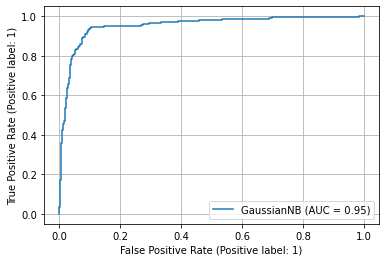

In [43]:
plt.figure(figsize=(10,5))
plot_roc_curve(naive_model,X_test,y_test)
plt.grid(True)
plt.show()

###### Logistic Regression

In [44]:
logistic_regressor =LogisticRegression()
lr_model = logistic_regressor.fit(X_train,y_train)
model_performance(lr_model)

CONFUSION MATRIX
[[1151   24]
 [ 100  132]] 

MISSCLASSIFIED PERCENTAGE
8.813077469793887 

CORRECTLY CLASSIFIED PERCENTAGE
91.18692253020612 

ACCURACY SCORE FOR TEST
0.8926907448070468 

ACCURACY SCORE FOR TRAIN
0.9219512195121953 

AUC SCORE
0.9620763022743948 

Kappa score
0.6315602747016041 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.920064  0.979574  0.948887      1175
           1   0.846154  0.568966  0.680412       232

    accuracy                       0.911869      1407
   macro avg   0.883109  0.774270  0.814650      1407
weighted avg   0.907877  0.911869  0.904618      1407



In [45]:
#Hyperparameter tunning of logistic regression
logistic_regressor1 =LogisticRegression(max_iter=1000) # tuning solver and penalty type
param ={'solver':['liblinear','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty':['l1','l2','elasticnet']}
grid_solver = GridSearchCV(logistic_regressor1,param_grid=param,cv=5)
grid_solver=grid_solver.fit(X_train,y_train)
grid_solver.best_params_

C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 443, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning:

Estimator fit failed. The 

{'penalty': 'l1', 'solver': 'saga'}

In [46]:
logistic_regressor1 =LogisticRegression(penalty='l1',solver='saga',max_iter=1000)
lr_model1 = logistic_regressor1.fit(X_train,y_train)
model_performance(lr_model1,cv=10)

CONFUSION MATRIX
[[1145   30]
 [  53  179]] 

MISSCLASSIFIED PERCENTAGE
5.899076048329779 

CORRECTLY CLASSIFIED PERCENTAGE
94.10092395167023 

ACCURACY SCORE FOR TEST
0.9346352583586626 

ACCURACY SCORE FOR TRAIN
0.9484756097560976 

AUC SCORE
0.9816434336023477 

Kappa score
0.7769273233991263 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.955760  0.974468  0.965023      1175
           1   0.856459  0.771552  0.811791       232

    accuracy                       0.941009      1407
   macro avg   0.906109  0.873010  0.888407      1407
weighted avg   0.939386  0.941009  0.939757      1407



Logisitic regression model is showing accuracy of 93.46% after hyperparameter tuning, model is good but there is scope of improvement in f1 score, precision and recall

#### Feature selection 

###### Feature selection and modeling with KNN

In [47]:
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [48]:
X= df_asteroid.drop(['Hazardous'],axis=1)
y= df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
knn =KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance',n_jobs=-1)
sfs_knn =sfs(knn,k_features='best',forward=True,cv=5)
selected_knn= sfs_knn.fit(X_train,y_train)

In [49]:
selected_knn.k_feature_names_

('Est Dia in Miles(min)', 'Minimum Orbit Intersection')

In [50]:
X=df_asteroid[list(selected_knn.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
knn =KNeighborsClassifier(n_neighbors=3,metric='manhattan',weights='distance') # full model with best params
knn_model = knn.fit(X_train,y_train)
model_performance(knn_model,cv=10)

CONFUSION MATRIX
[[1165   10]
 [   3  229]] 

MISSCLASSIFIED PERCENTAGE
0.923951670220327 

CORRECTLY CLASSIFIED PERCENTAGE
99.07604832977967 

ACCURACY SCORE FOR TEST
0.9850810536980749 

ACCURACY SCORE FOR TRAIN
0.9932926829268292 

AUC SCORE
0.9937234042553192 

Kappa score
0.9668521804056173 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.997432  0.991489  0.994452      1175
           1   0.958159  0.987069  0.972399       232

    accuracy                       0.990760      1407
   macro avg   0.977795  0.989279  0.983425      1407
weighted avg   0.990956  0.990760  0.990815      1407



Performance of the model is amazing. All parameters like accuracy, kappa, score, precision, AUC score are excellent. 

The end goal is to find the best model with 100% recall to make sure there is no type 2 error.

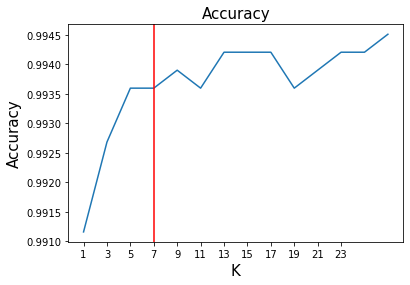

In [51]:
accuracy = []
for k in np.arange(1,29,2):
    knn = KNeighborsClassifier(k, metric = 'manhattan',weights='distance')
   
   
    score = cross_val_score(knn, X_train, y_train, cv = 5)

    score = score.mean()

    accuracy.append(score)
plt.plot(range(1,29,2), accuracy)


plt.title('Accuracy', fontsize = 15)
plt.xlabel('K', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 15)

plt.xticks(np.arange(1, 25, step = 2))

plt.axvline(x = 7, color = 'red')

plt.show()

In [52]:
X=df_asteroid[list(selected_knn.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
knn =KNeighborsClassifier(n_neighbors=7,metric='manhattan',weights='distance') # full model with best params
knn_model = knn.fit(X_train,y_train)
model_performance(knn_model,cv=10)

CONFUSION MATRIX
[[1168    7]
 [   4  228]] 

MISSCLASSIFIED PERCENTAGE
0.7818052594171997 

CORRECTLY CLASSIFIED PERCENTAGE
99.2181947405828 

ACCURACY SCORE FOR TEST
0.9857801418439716 

ACCURACY SCORE FOR TRAIN
0.9935975609756097 

AUC SCORE
0.9994790902421129 

Kappa score
0.9717587937864602 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.996587  0.994043  0.995313      1175
           1   0.970213  0.982759  0.976445       232

    accuracy                       0.992182      1407
   macro avg   0.983400  0.988401  0.985879      1407
weighted avg   0.992238  0.992182  0.992202      1407



The misclassified percentage reduced after tuning the model. 

###### Feature selection and modeling with Naive Bayes

In [53]:
X=df_asteroid.drop(['Hazardous'],axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=21)
gauss = GaussianNB()
sfs_gauss =sfs(gauss,k_features='best',forward=True,cv=5)
selected_gauss= sfs_gauss.fit(X_train,y_train)

In [54]:
selected_gauss.k_feature_names_

('Absolute Magnitude',
 'Minimum Orbit Intersection',
 'Semi Major Axis',
 'Asc Node Longitude')

In [55]:
X=df_asteroid[list(selected_gauss.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
gauss =GaussianNB()
naive_model =gauss.fit(X_train,y_train)
model_performance(naive_model,cv=10)

CONFUSION MATRIX
[[1171    4]
 [  30  202]] 

MISSCLASSIFIED PERCENTAGE
2.4164889836531627 

CORRECTLY CLASSIFIED PERCENTAGE
97.58351101634683 

ACCURACY SCORE FOR TEST
0.9765602836879431 

ACCURACY SCORE FOR TRAIN
0.9792682926829268 

AUC SCORE
0.9967938371239912 

Kappa score
0.9081243446095698 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.975021  0.996596  0.985690      1175
           1   0.980583  0.870690  0.922374       232

    accuracy                       0.975835      1407
   macro avg   0.977802  0.933643  0.954032      1407
weighted avg   0.975938  0.975835  0.975250      1407



This model performance is little poor as compared to KNN tuned model. Hence, the model is not competitive.

###### Feature selection and modeling with Logistic Regression

In [56]:
X=df_asteroid.drop(['Hazardous'],axis=1)
y= df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
logistic = LogisticRegression(n_jobs=-1) # taking everything default
sfs_log =sfs(logistic,k_features='best',forward=True,cv=5,verbose=3)
selected_log= sfs_log.fit(X_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    3.4s finished

[2021-05-25 10:03:17] Features: 1/33 -- score: 0.8405487804878049[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    4.4s finished

[2021-05-25 10:03:21] Features: 2/33 -- score: 0.8408536585365853[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s
[Para

In [57]:
selected_log.k_feature_names_

('Absolute Magnitude',
 'Est Dia in KM(min)',
 'Est Dia in KM(max)',
 'Est Dia in Miles(min)',
 'Est Dia in Miles(max)',
 'Close Approach Date',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Eccentricity',
 'Inclination',
 'Perihelion Distance',
 'Mean Motion')

In [58]:
X= df_asteroid[list(selected_log.k_feature_names_)]
y= df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
logistic = LogisticRegression(n_jobs=-1) # taking everything default
log_model = logistic.fit(X_train,y_train)
model_performance(log_model,cv=5)

CONFUSION MATRIX
[[1154   21]
 [ 120  112]] 

MISSCLASSIFIED PERCENTAGE
10.021321961620469 

CORRECTLY CLASSIFIED PERCENTAGE
89.97867803837953 

ACCURACY SCORE FOR TEST
0.8727846344110446 

ACCURACY SCORE FOR TRAIN
0.9134146341463415 

AUC SCORE
0.9535179750550257 

Kappa score
0.5609382019860881 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.905808  0.982128  0.942425      1175
           1   0.842105  0.482759  0.613699       232

    accuracy                       0.899787      1407
   macro avg   0.873957  0.732443  0.778062      1407
weighted avg   0.895304  0.899787  0.888222      1407



In [59]:
#Hyperparameter tuning of logistic regression after feature selection
X= df_asteroid[list(selected_log.k_feature_names_)]
y= df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
logistic = LogisticRegression()

param ={'solver':['liblinear','newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],'penalty':['l1','l2','elasticnet'],'C':np.logspace(-3,3,20)}
gridfit =GridSearchCV(logistic, cv=5, param_grid=param, n_jobs=-1,verbose=3)
grid_log= gridfit.fit(X_train,y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [0.84054878        nan        nan 0.84054878        nan 0.84054878
 0.8402439  0.84146341 0.84146341 0.8402439  0.8402439  0.8402439
        nan        nan        nan        nan        nan        nan
 0.84054878        nan        nan 0.84054878        nan 0.84054878
 0.8402439  0.84237805 0.84237805 0.8402439  0.8402439  0.8402439
        nan        nan        nan        nan        nan        nan
 0.84054878        nan        nan 0.84054878        nan 0.84054878
 0.83993902 0.84573171 0.84573171 0.83993902 0.83993902 0.83993902
        nan        nan        nan        nan        nan        nan
 0.84054878        nan        nan 0.84054878        nan 0.84054878
 0.83963415 0.84878049 0.84908537 0.83963415 0.84054878 0.83963415
        nan        nan        nan        nan        nan        nan
 0.84054878        nan        nan 0.84054878        na

In [60]:
np.logspace(-3,3,20)

array([1.00000000e-03, 2.06913808e-03, 4.28133240e-03, 8.85866790e-03,
       1.83298071e-02, 3.79269019e-02, 7.84759970e-02, 1.62377674e-01,
       3.35981829e-01, 6.95192796e-01, 1.43844989e+00, 2.97635144e+00,
       6.15848211e+00, 1.27427499e+01, 2.63665090e+01, 5.45559478e+01,
       1.12883789e+02, 2.33572147e+02, 4.83293024e+02, 1.00000000e+03])

In [61]:
grid_log.best_params_

{'C': 112.88378916846884, 'penalty': 'l2', 'solver': 'newton-cg'}

In [62]:
X= df_asteroid[list(selected_log.k_feature_names_)]
y= df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
logistic = LogisticRegression(penalty ='l2',solver ='liblinear' ,C= 233.572146) 
log_model = logistic.fit(X_train,y_train)
model_performance(log_model,cv=10)

CONFUSION MATRIX
[[1146   29]
 [  32  200]] 

MISSCLASSIFIED PERCENTAGE
4.33546552949538 

CORRECTLY CLASSIFIED PERCENTAGE
95.66453447050462 

ACCURACY SCORE FOR TEST
0.9481306990881458 

ACCURACY SCORE FOR TRAIN
0.9545731707317074 

AUC SCORE
0.9861115187087308 

Kappa score
0.841755919840847 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.972835  0.975319  0.974076      1175
           1   0.873362  0.862069  0.867679       232

    accuracy                       0.956645      1407
   macro avg   0.923099  0.918694  0.920877      1407
weighted avg   0.956433  0.956645  0.956532      1407



This model is not competitive with KNN tuned model. 

#### Random Forest

In [63]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [64]:
X=df_asteroid.drop('Hazardous',axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
rf =RandomForestClassifier()
sf =sfs(rf, cv=5, n_jobs=-1, k_features='best',verbose=3)
sfs_feature = sf.fit(X_train,y_train)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done  30 out of  33 | elapsed:   18.4s remaining:    1.8s
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   20.4s finished

[2021-05-25 10:06:51] Features: 1/33 -- score: 0.8457317073170731[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  28 out of  32 | elapsed:   14.4s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   15.8s finished

[2021-05-25 10:07:07] Features: 2/33 -- score: 0.9969512195121952[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   17.3s
[Parallel(n_jobs=-1)]: Done  27 out of  31 | elapsed:   21.9s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   22.2s finishe

In [65]:
sfs_feature.k_feature_names_ # best features

('Absolute Magnitude',
 'Est Dia in M(max)',
 'Est Dia in Miles(max)',
 'Minimum Orbit Intersection',
 'Orbital Period',
 'Perihelion Arg')

CONFUSION MATRIX
[[1173    2]
 [   1  231]] 

MISSCLASSIFIED PERCENTAGE
0.21321961620469082 

CORRECTLY CLASSIFIED PERCENTAGE
99.7867803837953 

ACCURACY SCORE FOR TEST
0.9943110435663627 

ACCURACY SCORE FOR TRAIN
0.9963414634146341 

AUC SCORE
0.9999486426999267 

Kappa score
0.9922712549643592 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.999148  0.998298  0.998723      1175
           1   0.991416  0.995690  0.993548       232

    accuracy                       0.997868      1407
   macro avg   0.995282  0.996994  0.996136      1407
weighted avg   0.997873  0.997868  0.997870      1407



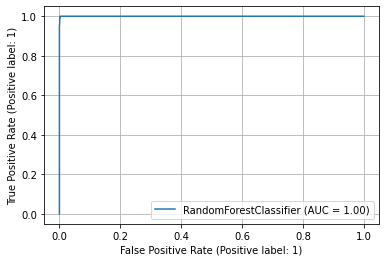

In [66]:
X=df_asteroid[list(sfs_feature.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
rf =RandomForestClassifier()
rf_model = rf.fit(X_train, y_train)
model_performance(rf_model,cv=10)
plot_roc_curve(rf,X_test,y_test)
plt.grid(True)
plt.show()

In [67]:
pd.DataFrame(rf_model.feature_importances_,index=X.columns)

,0
Absolute Magnitude,0.118003
Est Dia in M(max),0.096709
Est Dia in Miles(max),0.180273
Minimum Orbit Intersection,0.568064
Orbital Period,0.019973
Perihelion Arg,0.016979


###### Random Forest tuning

In [68]:
X=df_asteroid[list(sfs_feature.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
rf =RandomForestClassifier()
a = [{'n_estimators':[100,150,200] , 'criterion' :['gini', 'entropy'] ,'max_depth':range(13,20) , 'min_samples_split': range(3,6) }]

grid =GridSearchCV( estimator =rf, param_grid=a  ,cv=5 ,n_jobs =-1 ,verbose=3)
gird_rf = grid.fit(X_train,y_train)

Fitting 5 folds for each of 126 candidates, totalling 630 fits


In [69]:
gird_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 13,
 'min_samples_split': 3,
 'n_estimators': 150}

CONFUSION MATRIX
[[1173    2]
 [   1  231]] 

MISSCLASSIFIED PERCENTAGE
0.21321961620469082 

CORRECTLY CLASSIFIED PERCENTAGE
99.7867803837953 

ACCURACY SCORE FOR TEST
0.9936018237082067 

ACCURACY SCORE FOR TRAIN
0.9963414634146341 

AUC SCORE
0.9999486426999264 

Kappa score
0.9922712549643592 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.999148  0.998298  0.998723      1175
           1   0.991416  0.995690  0.993548       232

    accuracy                       0.997868      1407
   macro avg   0.995282  0.996994  0.996136      1407
weighted avg   0.997873  0.997868  0.997870      1407



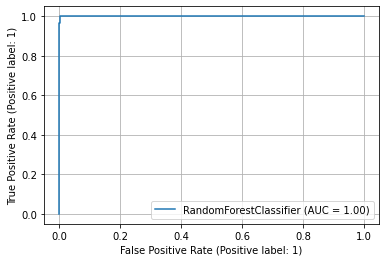

In [70]:
X=df_asteroid[list(sfs_feature.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
rf =RandomForestClassifier(criterion= 'gini' ,max_depth=13,min_samples_split=4,n_estimators=200)
rf_model = rf.fit(X_train, y_train)
model_performance(rf_model,cv=10)
plot_roc_curve(rf,X_test,y_test)
plt.grid(True)
plt.show()

This is the best model till now, it leads KNN tuned model in terms of mislclassified percentage. Every parameter whether it is accuracy, f1 score, precision and recall are almost 99%.

There is only 1 false negative in the model, the search for best model is still on.

#### AdaBoost

In [71]:
from sklearn.ensemble import AdaBoostClassifier , GradientBoostingClassifier
from mlxtend.feature_selection import SequentialFeatureSelector 

In [72]:
X=df_asteroid.drop(['Hazardous'],axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
ada =AdaBoostClassifier()
sfs_f =SequentialFeatureSelector( ada, k_features='best' ,cv=5,n_jobs=-1, verbose=2)
sfs_ada =sfs_f.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    6.8s finished

[2021-05-25 10:16:05] Features: 1/33 -- score: 0.8411585365853659[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.1s finished

[2021-05-25 10:16:13] Features: 2/33 -- score: 0.8628048780487806[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   15.2s finished

[2021-05-25 10:16:28] Features: 3/33 -- score: 0.9945121951219512[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   19.7s finished

[2021-05-25 10:16:48] Features: 4/33 -- score: 0.9954268292682927[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   25.9s remaining:

In [73]:
sfs_ada.k_feature_names_

('Absolute Magnitude',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Eccentricity')

In [74]:
X=df_asteroid[list(sfs_ada.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
ada =AdaBoostClassifier()
ada_model =ada.fit(X_train,y_train)
model_performance(ada_model,cv=10)

CONFUSION MATRIX
[[1172    3]
 [   2  230]] 

MISSCLASSIFIED PERCENTAGE
0.35536602700781805 

CORRECTLY CLASSIFIED PERCENTAGE
99.64463397299218 

ACCURACY SCORE FOR TEST
0.9893465045592705 

ACCURACY SCORE FOR TRAIN
0.9942073170731707 

AUC SCORE
0.9998862802641233 

Kappa score
0.9871187582739319 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.998296  0.997447  0.997871      1175
           1   0.987124  0.991379  0.989247       232

    accuracy                       0.996446      1407
   macro avg   0.992710  0.994413  0.993559      1407
weighted avg   0.996454  0.996446  0.996449      1407



The model is very good but not competitive with Random Forest with respect to correctly classified and misclassified percentage.

###### AdaBoost Classifier Tuning

In [76]:
from xgboost import XGBClassifier

In [77]:
X= np.array(df_asteroid[list(sfs_ada.k_feature_names_)])
y= np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
ada =AdaBoostClassifier()

param = {'base_estimator':[KNeighborsClassifier(), LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(),XGBClassifier(), GradientBoostingClassifier()],
         'n_estimators': range(40,60,1),'learning_rate':np.logspace(-3,3,10)} 

grid1 = GridSearchCV(ada,param_grid=param, cv=3, n_jobs=-1, verbose=3)
Grid1 = grid1.fit(X_train, y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits


C:\Users\rutuj\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning:

One or more of the test scores are non-finite: [       nan        nan        nan ... 0.99512158 0.99512158 0.99512158]



In [78]:
Grid1.best_params_

{'base_estimator': DecisionTreeClassifier(),
 'learning_rate': 1000.0,
 'n_estimators': 59}

In [79]:
X= np.array(df_asteroid[list(sfs_ada.k_feature_names_)])
y= np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)

base = RandomForestClassifier(criterion='gini', max_depth=17,min_samples_split=3,n_estimators=150)  #  random forest parameter taken from grid search of random forest
ada =AdaBoostClassifier(base_estimator= base, learning_rate=2.1544, n_estimators=51)
ada_tuned_model = ada.fit(X_train,y_train)
model_performance(ada_tuned_model, cv=5)

CONFUSION MATRIX
[[1173    2]
 [   0  232]] 

MISSCLASSIFIED PERCENTAGE
0.14214641080312723 

CORRECTLY CLASSIFIED PERCENTAGE
99.85785358919688 

ACCURACY SCORE FOR TEST
0.9936018777920801 

ACCURACY SCORE FOR TRAIN
0.9945121951219512 

AUC SCORE
0.99994497432135 

Kappa score
0.9948563845537995 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   1.000000  0.998298  0.999148      1175
           1   0.991453  1.000000  0.995708       232

    accuracy                       0.998579      1407
   macro avg   0.995726  0.999149  0.997428      1407
weighted avg   0.998591  0.998579  0.998581      1407



The model is fine but perform wells when Random forest is used as base estimator. However, Random forest is giving best performance solely. This doesnt justify the use of AdaBoost Classifier.

#### Gradient Boost

In [80]:
X=df_asteroid.drop(['Hazardous'],axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
gb =GradientBoostingClassifier()
sfs_f =SequentialFeatureSelector( gb, k_features='best' ,cv=5,n_jobs=-1, verbose=2)
sfs_gb =sfs_f.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:    7.8s finished

[2021-05-25 11:15:38] Features: 1/33 -- score: 0.8442073170731709[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.8s finished

[2021-05-25 11:15:47] Features: 2/33 -- score: 0.8496951219512194[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   10.4s finished

[2021-05-25 11:15:58] Features: 3/33 -- score: 0.9951219512195122[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.1s finished

[2021-05-25 11:16:09] Features: 4/33 -- score: 0.9960365853658537[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   15.5s remaining:

In [81]:
sfs_gb.k_feature_names_

('Absolute Magnitude',
 'Est Dia in KM(min)',
 'Est Dia in KM(max)',
 'Est Dia in M(min)',
 'Est Dia in M(max)',
 'Est Dia in Miles(min)',
 'Est Dia in Miles(max)',
 'Est Dia in Feet(min)',
 'Est Dia in Feet(max)',
 'Close Approach Date',
 'Miss Dist.(Astronomical)',
 'Orbit Uncertainity',
 'Minimum Orbit Intersection',
 'Epoch Osculation',
 'Semi Major Axis',
 'Orbital Period',
 'Perihelion Arg',
 'Aphelion Dist',
 'Mean Motion')

In [82]:
X=df_asteroid[list(sfs_gb.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)

gb =GradientBoostingClassifier()
gb_model =gb.fit(X_train,y_train)
model_performance(gb_model,cv=10)


CONFUSION MATRIX
[[1174    1]
 [   4  228]] 

MISSCLASSIFIED PERCENTAGE
0.35536602700781805 

CORRECTLY CLASSIFIED PERCENTAGE
99.64463397299218 

ACCURACY SCORE FOR TEST
0.9928976697061802 

ACCURACY SCORE FOR TRAIN
0.9957317073170732 

AUC SCORE
0.99994497432135 

Kappa score
0.9870291737574465 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.996604  0.999149  0.997875      1175
           1   0.995633  0.982759  0.989154       232

    accuracy                       0.996446      1407
   macro avg   0.996119  0.990954  0.993515      1407
weighted avg   0.996444  0.996446  0.996437      1407



Although the model is fantastic, it is doing well only in precision and not in recall score, Random Forest takes the edge over it in type 2 error. 

Efforts were applied to change the base estimator and find best combination as it was done in AdaBoost classifier but Random Forest model is doing well till now. These model are not included here as these were not competitive with Random Forest performance.

#### XGBoost

In [83]:
X=df_asteroid.drop(['Hazardous'],axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()
xgb_full_model =xgb.fit(X_train,y_train)
model_performance(xgb_full_model)

[11:27:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



CONFUSION MATRIX
[[1174    1]
 [   2  230]] 

MISSCLASSIFIED PERCENTAGE
0.21321961620469082 

CORRECTLY CLASSIFIED PERCENTAGE
99.7867803837953 

ACCURACY SCORE FOR TEST
[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do th

[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9928901340198379 

ACCURACY SCORE FOR TRAIN
[11:27:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:27:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9939024390243902 

AUC SCORE
0.9999743213499633 

Kappa score
0.9922444727399005 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.998299  0.999149  0.998724      1175
           1   0.995671  0.991379  0.993521       232

    accuracy                       0.997868      1407
   macro avg   0.996985  0.995264  0.996122      1407
weighted avg   0.997866  0.997868  0.997866      1407



In [84]:
from xgboost import XGBClassifier
X=df_asteroid.drop(['Hazardous'],axis=1)
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()
sfs_f =SequentialFeatureSelector( xgb, k_features='best' ,cv=5,n_jobs=-1, verbose=2)
sfs_xgb =sfs_f.fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 out of  33 | elapsed:   14.5s finished

[2021-05-25 11:27:26] Features: 1/33 -- score: 0.8478658536585366[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   14.1s finished

[2021-05-25 11:27:40] Features: 2/33 -- score: 0.9963414634146341[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  31 out of  31 | elapsed:   10.3s finished

[2021-05-25 11:27:51] Features: 3/33 -- score: 0.9972560975609757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   11.0s finished

[2021-05-25 11:28:02] Features: 4/33 -- score: 0.9972560975609757[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  29 out of  29 | elapsed:   11.4s remaining:

In [85]:
sfs_xgb.k_feature_names_

('Absolute Magnitude', 'Minimum Orbit Intersection', 'Perihelion Arg')

In [86]:
X=df_asteroid[list(sfs_xgb.k_feature_names_)]    # running XGBoost with selected feature 
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()
xgb_model =xgb.fit(X_train,y_train)
model_performance(xgb_model,cv=10)

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CONFUSION MATRIX
[[1172    3]
 [   3  229]] 

MISSCLASSIFIED PERCENTAGE
0.42643923240938164 

CORRECTLY CLASSIFIED PERCENTAGE
99.57356076759062 

ACCURACY SCORE FOR TEST
[11:35:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9921833839918947 

ACCURACY SCORE FOR TRAIN
[11:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[11:35:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.997560975609756 

AUC SCORE
0.9998771093176815 

Kappa score
0.9845157740278797 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.997447  0.997447  0.997447      1175
           1   0.987069  0.987069  0.987069       232

    accuracy                       0.995736      1407
   macro avg   0.992258  0.992258  0.992258      1407
weighted avg   0.995736  0.995736  0.995736      1407



In [87]:
X= np.array(df_asteroid[list(sfs_xgb.k_feature_names_)])
y=np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()

param_xgb = {'booster':['gbtree', 'gblinear', 'dart'],'learning_rate':np.linspace(.1,.9,10),'min_split_loss':np.logspace(-10,10,15),'max_depth':[4,5,6,7,8]}

grid_xgb = GridSearchCV(xgb, param_grid = param_xgb,cv=3, verbose=3,n_jobs=-1)  # tuning hyperparameter with grid search
Grid_Xgb=grid_xgb.fit(X_train,y_train)

Fitting 3 folds for each of 2250 candidates, totalling 6750 fits


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [88]:
Grid_Xgb.best_estimator_  # result of tuned hyperparameter for XGBoost classifier

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=1, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.9, max_delta_step=0, max_depth=5,
              min_child_weight=1, min_split_loss=1.0, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [89]:
#XGBoost model with tuned parameters
X= np.array(df_asteroid[list(sfs_xgb.k_feature_names_)])
y=np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier( booster='gbtree' ,   
                    learning_rate=0.5444444444444445,
                    min_split_loss =1.0,
                    max_depth=4)
xgb_model_tuned =xgb.fit(X_train,y_train)
model_performance(xgb_model_tuned, cv=5)

[13:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CONFUSION MATRIX
[[1172    3]
 [   5  227]] 

MISSCLASSIFIED PERCENTAGE
0.5685856432125089 

CORRECTLY CLASSIFIED PERCENTAGE
99.43141435678749 

ACCURACY SCORE FOR TEST
[13:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



0.992180914161682 

ACCURACY SCORE FOR TRAIN
[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[13:04:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
0.9960365853658537 

AUC SCORE
0.9999009537784299 

Kappa score
0.9792826984027653 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   0.995752  0.997447  0.996599      1175
           1   0.986957  0.978448  0.982684       232

    accuracy                       0.994314      1407
   macro avg   0.991354  0.987948  0.989641      1407
weighted avg   0.994302  0.994314  0.994304      1407



Tuned XGBoost model is competitive, it lies behind little bit with respect to recall (Type 2 error) when compared with Random Forest.

#### Combined Prediction
Using AdaBoost, XGBoost and Gradient Boosting as voting mechanism

In [90]:
def voting_row( array):
  count1,count0 = 0,0
  for value in array:
    if value ==1:
      count1 = count1+1
    elif value==0:
      count0 = count0+1
    else:
      print("Something is wrong with data, it should contain only 0 and 1 value")
  if count1>=count0:
    return 1
  else:
    return 0 

In [91]:
#  AdaBoost
X=df_asteroid[list(sfs_ada.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
ada =AdaBoostClassifier()
ada_model =ada.fit(X_train,y_train)
ada_y_predict = ada_model.predict(X_test)    # calculating prediction via AdaBoost

# Gradient Boost

X=df_asteroid[list(sfs_gb.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
gb =GradientBoostingClassifier()
gb_model =gb.fit(X_train,y_train) 
gb_y_predict = gb_model.predict(X_test) # storing prediction of Gradient Boost model 

#  Xg boosting 
X=df_asteroid[list(sfs_xgb.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()
xgb_model =xgb.fit(X_train,y_train)  
xgb_y_predict = xgb_model.predict(X_test) # storing prediction of XGBoost model



stacked_vertically=np.column_stack( (ada_y_predict,gb_y_predict,xgb_y_predict))   # stacking prediction array
predict_df =pd.DataFrame(stacked_vertically,columns=['ada','gb','xgb'])       # converting prediction into dataframe

final_y_predict =predict_df.apply(voting_row,axis=1)   # applying voting_row function  to calculate final prediction based on voting from AdaBoost, Gradient Boost and XGBoost model

[13:04:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



In [92]:
cm=confusion_matrix(y_test,final_y_predict)     # code to evalute performance 
print(cm,'\n')
total = len(y_test)
miss = 100*(cm[0][1]+cm[1][0])/total
correct = 100*(cm[0][0]+cm[1][1])/total
print('MISSCLASSIFIED PERCENTAGE')
print(miss,'\n')
print("CORRECTLY CLASSIFIED PERCENTAGE")
print(correct,'\n')
print("CALSSIFICATION REPORT")
print(classification_report(y_test,final_y_predict,digits=5))

[[1173    2]
 [   3  229]] 

MISSCLASSIFIED PERCENTAGE
0.35536602700781805 

CORRECTLY CLASSIFIED PERCENTAGE
99.64463397299218 

CALSSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99745   0.99830   0.99787      1175
           1    0.99134   0.98707   0.98920       232

    accuracy                        0.99645      1407
   macro avg    0.99440   0.99268   0.99354      1407
weighted avg    0.99644   0.99645   0.99644      1407



Combined model with advance algorithm   shows good performance  but computationally expensive and lies behing a little bit as compared to Random Forest with respect to recall.

#### Combined prediction using probabilities ( AdaBoost, Gradient Boost, XGBoost)


In [93]:
#AdaBoost
X=df_asteroid[list(sfs_ada.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
ada =AdaBoostClassifier()
ada_model =ada.fit(X_train,y_train)
ada_y_predict_prob = ada_model.predict_proba(X_test)[:,1]    # calculating probabilites via AdaBoost

#Gradient Boost
X=df_asteroid[list(sfs_gb.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
gb =GradientBoostingClassifier()
gb_model =gb.fit(X_train,y_train) 
gb_y_predict_prob = gb_model.predict_proba(X_test)[:,1] # storing probabilities of Gradient Boost model 

#XGBoost 
X=df_asteroid[list(sfs_xgb.k_feature_names_)]
y=df_asteroid['Hazardous']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=21)
xgb = XGBClassifier()
xgb_model =xgb.fit(X_train,y_train)  
xgb_y_predict_prob= xgb_model.predict_proba(X_test)[:,1] # storing probabilities of XGBoost model



stacked_vertically_prob=np.column_stack( (ada_y_predict_prob ,gb_y_predict_prob ,xgb_y_predict_prob))  # stacking probabilities
predict_prob_df =pd.DataFrame(stacked_vertically_prob,columns=['ada','gb','xgb'])    # converting stacked probabilites into data frame

final_y_predict_prob =predict_prob_df.apply(lambda x: np.mean(x) ,axis=1)  #   calculating mean probabilies from AdaBoost, Gradient Boost and XGBoost and storing into final_y_predict_proba

C:\Users\rutuj\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].



[13:04:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [94]:
final_prediction= np.array(list(map(lambda x: 1 if x>=.5 else 0,final_y_predict_prob )))    # conveting probabilites into prediction using threshold 0.5

In [95]:
cm=confusion_matrix(y_test,final_prediction)    #  checking performance 
print(cm,'\n')
total = len(y_test)
miss = 100*(cm[0][1]+cm[1][0])/total
correct = 100*(cm[0][0]+cm[1][1])/total
print('MISSCLASSIFIED PERCENTAGE')
print(miss,'\n')
print("CORRECTLY CLASSIFIED PERCENTAGE")
print(correct,'\n')
print("CALSSIFICATION REPORT")
print(classification_report(y_test,final_y_predict,digits=5))

[[1172    3]
 [   4  228]] 

MISSCLASSIFIED PERCENTAGE
0.4975124378109453 

CORRECTLY CLASSIFIED PERCENTAGE
99.50248756218906 

CALSSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99745   0.99830   0.99787      1175
           1    0.99134   0.98707   0.98920       232

    accuracy                        0.99645      1407
   macro avg    0.99440   0.99268   0.99354      1407
weighted avg    0.99644   0.99645   0.99644      1407



In [96]:
# finding youden index and threshold from the dataframe formed from the true positive rate, false positive rate, threshold from the combined probabilities
fpr,tpr ,thresh=roc_curve(y_test,final_y_predict_prob)
table_youden =pd.DataFrame( np.column_stack((fpr,tpr,thresh)) ,columns=['fpr','tpr','thresh'])
table_youden['diff']= table_youden['tpr']- table_youden['fpr']
table_youden['ranking'] = table_youden['diff'].rank(ascending= False)
table_youden.sort_values(by='ranking',ascending=True).head(5)

,fpr,tpr,thresh,diff,ranking
28,0.002553,1.000000,0.291740,0.997447,1.0
26,0.000851,0.978448,0.628054,0.977597,2.0
27,0.002553,0.978448,0.526603,0.975895,3.0
29,0.032340,1.000000,0.145945,0.967660,4.0
30,0.034894,1.000000,0.145348,0.965106,5.0


In [97]:
final_prediction= np.array(list(map(lambda x: 1 if x>=0.253835 else 0,final_y_predict_prob )))

cm=confusion_matrix(y_test,final_prediction)
print(cm,'\n')
total = len(y_test)
miss = 100*(cm[0][1]+cm[1][0])/total
correct = 100*(cm[0][0]+cm[1][1])/total
print('MISSCLASSIFIED PERCENTAGE')
print(miss,'\n')
print("CORRECTLY CLASSIFIED PERCENTAGE")
print(correct,'\n')
print("CALSSIFICATION REPORT")
print(classification_report(y_test,final_y_predict,digits=5))

[[1171    4]
 [   0  232]] 

MISSCLASSIFIED PERCENTAGE
0.28429282160625446 

CORRECTLY CLASSIFIED PERCENTAGE
99.71570717839374 

CALSSIFICATION REPORT
              precision    recall  f1-score   support

           0    0.99745   0.99830   0.99787      1175
           1    0.99134   0.98707   0.98920       232

    accuracy                        0.99645      1407
   macro avg    0.99440   0.99268   0.99354      1407
weighted avg    0.99644   0.99645   0.99644      1407



The combined prediction model from  AdaBoost, Gradient Boost and XGBoost is good and competitive with random forest, although it is not preferable as it would be computationally expensive. The model performs very well in all scores specially in recall after finding the correct threshold from Youden's index.

All the models built can be improved in recall using Youden's index at the cost of false positive rate, however the best model performs well without compromising any score.

#### Stacking Classifier

In [98]:
from sklearn.ensemble import StackingClassifier

Stacking with Random Forest, AdaBoost Classifier, Gradient Boost and XGBoost as estimator and Gaussian NB as final estimator.

In [99]:
X= np.array(df_asteroid[list(sfs_ada.k_feature_names_)])
y= np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3)
estim = [ ('rf' ,RandomForestClassifier()) ,('ada', AdaBoostClassifier()),('gb',GradientBoostingClassifier()) ,('xgb',XGBClassifier())]
base = GaussianNB()
stack = StackingClassifier(estimators=estim , final_estimator=base,cv=3,n_jobs=-1)
stack_model =stack.fit(X_train,y_train)
model_performance(stack_model,cv=5)

CONFUSION MATRIX
[[1172    3]
 [   0  232]] 

MISSCLASSIFIED PERCENTAGE
0.21321961620469082 

CORRECTLY CLASSIFIED PERCENTAGE
99.7867803837953 

ACCURACY SCORE FOR TEST
0.9928901340198379 

ACCURACY SCORE FOR TRAIN
0.9945121951219512 

AUC SCORE
0.9991489361702127 

Kappa score
0.9922978528508528 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   1.000000  0.997447  0.998722      1175
           1   0.987234  1.000000  0.993576       232

    accuracy                       0.997868      1407
   macro avg   0.993617  0.998723  0.996149      1407
weighted avg   0.997895  0.997868  0.997873      1407



This is the best model with excellent scores specially 100% in recall. Recall is 100% for 1 which means there is no type 2 error, this is the model we are looking for. 

The feature used in this model are from the forward selection technique where etimator was AdaBoost.

The features used are:

- 'Absolute Magnitude',
- 'Minimum Orbit Intersection',
- 'Jupiter Tisserand Invariant',
- 'Eccentricity'

#### Save Earth

Final model using stacking classifier with estimator as Random Forest classifier and final estimator as Naive Bayes

In [100]:
X= np.array(df_asteroid[list(sfs_ada.k_feature_names_)])
y= np.array(df_asteroid['Hazardous'])
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 21, test_size = 0.3)
estim = [ ('rf' ,RandomForestClassifier()) ]
base = GaussianNB()
stack = StackingClassifier(estimators=estim , final_estimator=base,cv=5,n_jobs=-1)
stack_model =stack.fit(X_train,y_train)
model_performance(stack_model,cv=5)

CONFUSION MATRIX
[[1172    3]
 [   0  232]] 

MISSCLASSIFIED PERCENTAGE
0.21321961620469082 

CORRECTLY CLASSIFIED PERCENTAGE
99.7867803837953 

ACCURACY SCORE FOR TEST
0.992892657933924 

ACCURACY SCORE FOR TRAIN
0.9951219512195122 

AUC SCORE
0.9991489361702127 

Kappa score
0.9922978528508528 

CLASSIFICATION REPORT
              precision    recall  f1-score   support

           0   1.000000  0.997447  0.998722      1175
           1   0.987234  1.000000  0.993576       232

    accuracy                       0.997868      1407
   macro avg   0.993617  0.998723  0.996149      1407
weighted avg   0.997895  0.997868  0.997873      1407



This is the desire model. It is performing well in all scorers, exceptionally good in recall (100%) for 1, along with 99.43 % accuracy on test data.

The train accuracy and test accuracy is almost same which ensures neglibile overfitting. The kappa score is 0.9929, misclassified percentage is very less 0.213 percent

The features used in this model are the same as the ones used in the stack model.

The feature used are:
- 'Absolute Magnitude',
- 'Minimum Orbit Intersection',
- 'Jupiter Tisserand Invariant',
- 'Eccentricity'

The model used only two algorithm Naive Bayes and Random Forest.

In [101]:
list(sfs_ada.k_feature_names_)

['Absolute Magnitude',
 'Minimum Orbit Intersection',
 'Jupiter Tisserand Invariant',
 'Eccentricity']

In [102]:
y_prob =stack_model.predict_proba(X_test)[:,1]
fpr,tpr ,thresh=roc_curve(y_test,y_prob)
table_youden =pd.DataFrame( np.column_stack((fpr,tpr,thresh)) ,columns=['fpr','tpr','thresh'])
table_youden['diff']= table_youden['tpr']- table_youden['fpr']
table_youden['ranking'] = table_youden['diff'].rank(ascending= False)
table_youden.sort_values(by='ranking',ascending=True)

,fpr,tpr,thresh,diff,ranking
1,0.001702,1.0,1.000000e+00,0.998298,1.0
2,0.004255,1.0,4.236412e-12,0.995745,2.0
3,0.005957,1.0,1.566878e-15,0.994043,3.0
4,0.007660,1.0,2.548339e-17,0.992340,4.0
5,0.011064,1.0,2.120338e-18,0.988936,5.0
6,0.014468,1.0,6.611180e-19,0.985532,6.0
7,0.016170,1.0,7.509771e-20,0.983830,7.0
8,0.023830,1.0,2.735902e-20,0.976170,8.0
9,0.105532,1.0,1.049803e-20,0.894468,9.0
0,0.000000,0.0,2.000000e+00,0.000000,10.5


In [103]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve

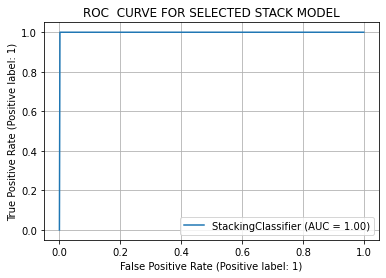

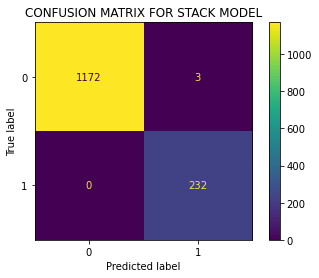

In [104]:
plot_roc_curve(stack_model,X_test,y_test)
plt.title("ROC  CURVE FOR SELECTED STACK MODEL")
plt.grid(True)
plot_confusion_matrix(stack_model,X_test,y_test)
plt.title('CONFUSION MATRIX FOR STACK MODEL')
plt.show()